# Assignment 4: Descriptive Tables
## Author: Kush Mehta

In [3]:
# Find working directory
import os
path = os.getcwd()
print(path)

/Users/kush/Python


In [32]:
# Import packages here: numpy, pandas, and seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data Set
- Import the data set on women labor force participation from Canvas: Files $\to$ Data $\to$ mroz.csv
- The description of the variables can be found [here](http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.des)

In [8]:
# Import data
data=birth = pd.read_csv("/Users/kush/Data/mroz.csv")
# Check the information of the data set
data.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


## Crosstabs and Pivot Tables
- Create a crosstab to show the frequency of women by labor force participation and whether someone lives in the city
- Create another crosstab to show the relative frequency of women by labor force participation and whether someone lives in the city
- Create a pivot table to summarize the mean of education by labor force participation and whether someone lives in the city. Round to 2 decimal places
- Create another pivot table to summarize the mean of education by labor force participation and THEN whether someone lives in the city. Round to 2 decimal places

In [10]:
# Use value_counts() to inspect the values that the variable "city" can take
city_value_counts = data['city'].value_counts()
print(city_value_counts)

city
1    484
0    269
Name: count, dtype: int64


In [12]:
# Inspect the values that the variable "inlf" (in labor force) can take
inlf_values = data['inlf'].value_counts()
print(inlf_values)

inlf
1    428
0    325
Name: count, dtype: int64


In [14]:
# Convert "city" and "inlf" into categorical variables to rename them later
data['city'] = data['city'].astype('category')
data['inlf'] = data['inlf'].astype('category')
print(data.dtypes[['city', 'inlf']])

city    category
inlf    category
dtype: object


In [ ]:
# Rename the categories within "city" and "inlf": HINT
labor['city'] = labor['city'].cat.rename_categories({0: "not city", 1: "city"})
labor['inlf'] = labor['inlf'].cat.rename_categories({0: "not in LF", 1: "in LF"})

In [16]:
# Create a table to show the frequency of women by labor force participation and whether someone lives in the city
frequency_table = pd.crosstab(data['inlf'], data['city'])
print(frequency_table)

city    0    1
inlf          
0     115  210
1     154  274


In [18]:
# Create a table to show the relative frequency (proportion) of women by labor force participation and whether someone 
# lives in the city
relative_frequency_table = pd.crosstab(data['inlf'], data['city'], normalize='all')
print(relative_frequency_table)

city         0         1
inlf                    
0     0.152722  0.278884
1     0.204515  0.363878


In [24]:
# Create a pivot table to summarize the mean of education by labor force participation and whether someone lives in the city
# Round to 2 decimal places
mean_education_pivot = data.pivot_table(
    values='educ', 
    index='inlf',
    columns='city',
    aggfunc='mean',
    observed=False
).round(2)
print(mean_education_pivot)

city      0      1
inlf              
0     11.30  12.07
1     12.18  12.93


In [28]:
# Create a pivot table to summarize the mean of education by labor force participation and THEN whether someone lives in the city
# Round to 2 decimal places
mean_education_pivot_2 = data.pivot_table(
    values='educ',  
    index=['inlf', 'city'],
    aggfunc='mean',
    observed=False
).round(2)
print(mean_education_pivot_2)

            educ
inlf city       
0    0     11.30
     1     12.07
1    0     12.18
     1     12.93


## Table Visualization
- Create a heat map to visualize the 1st pivot table you created above to summarize education. Change title, x label, y label, x tick label, and y tick label.
- Create another heat map to visualize the 2nd pivot table you created above to summarize education. You do not need to change the labels of this plot. Just observe this plot and see that it is not as effective to visualize the data and add the labels compared to the first one.

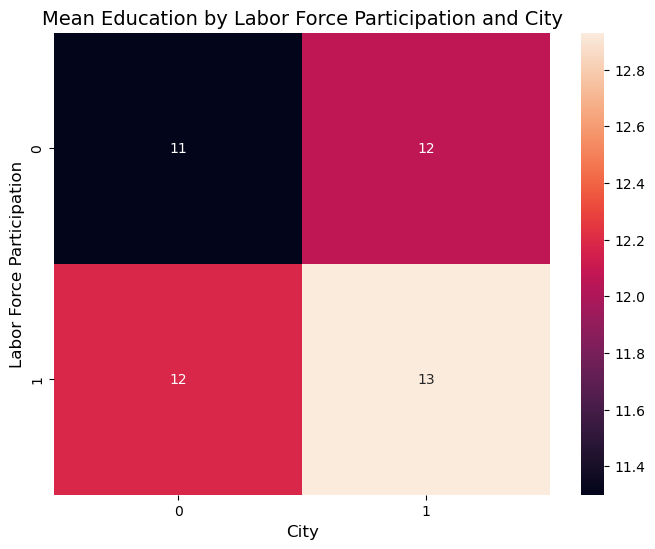

In [40]:
# 1st heat map
plt.figure(figsize=(8, 6))
sns.heatmap(mean_education_pivot, annot=True, cbar=True)

# Customize the labels and title
plt.title("Mean Education by Labor Force Participation and City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Labor Force Participation", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

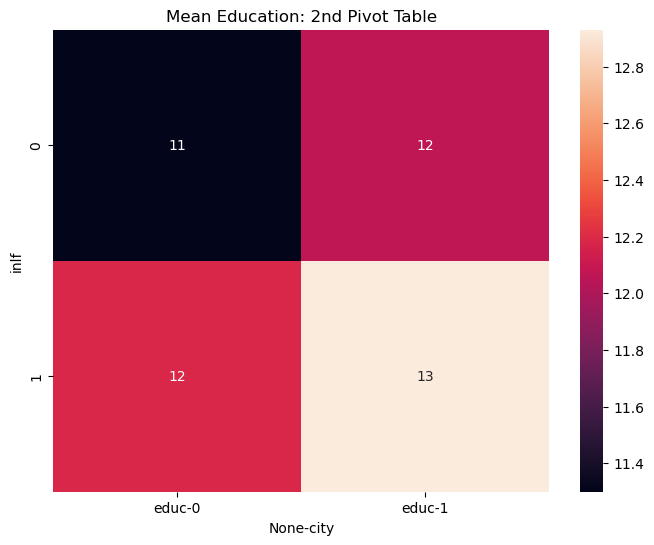

In [42]:
# 2nd heat map
plt.figure(figsize=(8, 6))
sns.heatmap(mean_education_pivot_2.unstack(level=1), annot=True, cbar=True)

plt.title("Mean Education: 2nd Pivot Table")
plt.show()

In [44]:
!jupyter nbconvert --to html Assignment_4.ipynb

[NbConvertApp] Converting notebook Assignment_4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 353999 bytes to Assignment_4.html
